In [24]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
data = pd.read_csv('./model_state.csv')

In [26]:
#Overall view
data.head(15)

,fips,Fall,Spring,Summer,Winter,max_warming_season,Annual,STUSAB,STATE_NAME,STATENS
0,1,-0.195668,-0.105862,-0.325009,0.458526,Winter,-0.035048,AL,Alabama,1779775
1,4,1.203951,1.384480,1.274455,1.388388,Winter,1.319880,AZ,Arizona,1779777
2,5,-0.042540,0.266399,0.058596,0.532247,Winter,0.214074,AR,Arkansas,68085
3,6,1.570921,1.449242,1.478335,1.412430,Fall,1.480561,CA,California,1779778
4,8,1.055309,1.436910,1.367845,1.838758,Winter,1.438589,CO,Colorado,1779779
5,9,1.453093,1.543407,1.580628,2.633975,Winter,1.801492,CT,Connecticut,1779780
6,10,1.378949,1.537848,1.522878,2.201002,Winter,1.661683,DE,Delaware,1779781
7,12,1.076586,0.860797,0.914455,1.300233,Winter,1.034878,FL,Florida,294478
8,13,0.251217,0.174462,-0.016056,1.109362,Winter,0.384049,GA,Georgia,1705317
9,16,0.686631,1.004868,1.072720,1.409905,Winter,1.046917,ID,Idaho,1779783


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   fips                48 non-null     int64  
 1   Fall                48 non-null     float64
 2   Spring              48 non-null     float64
 3   Summer              48 non-null     float64
 4   Winter              48 non-null     float64
 5   max_warming_season  48 non-null     object 
 6   Annual              48 non-null     float64
 7   STUSAB              48 non-null     object 
 8   STATE_NAME          48 non-null     object 
 9   STATENS             48 non-null     int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 3.9+ KB


In [28]:
df = pd.DataFrame(data)

In [29]:
df.apply(lambda x: sum(x.isnull()))

fips                  0
Fall                  0
Spring                0
Summer                0
Winter                0
max_warming_season    0
Annual                0
STUSAB                0
STATE_NAME            0
STATENS               0
dtype: int64

In [30]:
data.describe()

,fips,Fall,Spring,Summer,Winter,Annual,STATENS
count,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,4.800000e+01
mean,30.187500,0.785324,1.004280,0.773815,1.668654,1.060972,1.480213e+06
std,15.448826,0.523901,0.480059,0.630515,0.713727,0.545513,4.895437e+05
min,1.000000,-0.195668,-0.105862,-0.325009,0.339203,-0.035048,6.808500e+04
25%,18.750000,0.361859,0.724370,0.212762,1.191115,0.641008,1.203653e+06
50%,30.500000,0.769284,1.074631,0.866977,1.507633,1.102286,1.779782e+06
75%,42.500000,1.163273,1.358113,1.280039,2.274480,1.518205,1.779795e+06
max,56.000000,1.655732,1.759266,2.114864,3.145933,2.038868,1.785534e+06


In [31]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
fips,48.0,3.018750e+01,15.448826,1.000000,1.875000e+01,3.050000e+01,4.250000e+01,5.600000e+01
Fall,48.0,7.853236e-01,0.523901,-0.195668,3.618589e-01,7.692840e-01,1.163273e+00,1.655732e+00
Spring,48.0,1.004280e+00,0.480059,-0.105862,7.243704e-01,1.074631e+00,1.358113e+00,1.759266e+00
Summer,48.0,7.738148e-01,0.630515,-0.325009,2.127619e-01,8.669771e-01,1.280039e+00,2.114864e+00
Winter,48.0,1.668654e+00,0.713727,0.339203,1.191115e+00,1.507633e+00,2.274480e+00,3.145933e+00
Annual,48.0,1.060972e+00,0.545513,-0.035048,6.410079e-01,1.102286e+00,1.518205e+00,2.038868e+00
STATENS,48.0,1.480213e+06,489543.672180,68085.000000,1.203653e+06,1.779782e+06,1.779795e+06,1.785534e+06


In [32]:
data.apply(lambda x: len(x.unique()))

fips                  48
Fall                  48
Spring                48
Summer                48
Winter                48
max_warming_season     2
Annual                48
STUSAB                48
STATE_NAME            48
STATENS               48
dtype: int64

In [33]:
#Filter categorical variables
categorical_columns = [x for x in data.dtypes.index if data.dtypes[x]=='object']
#Exclude ID cols and source:
categorical_columns = [x for x in categorical_columns if x not in ['fips']]
#Print frequency of categories
for col in categorical_columns:
    print('\nFrequency of Categories for varible %s'%col)
    print(data[col].value_counts())


Frequency of Categories for varible max_warming_season
max_warming_season
Winter    47
Fall       1
Name: count, dtype: int64

Frequency of Categories for varible STUSAB
STUSAB
AL    1
AZ    1
AR    1
CA    1
CO    1
CT    1
DE    1
FL    1
GA    1
ID    1
IL    1
IN    1
IA    1
KS    1
KY    1
LA    1
ME    1
MD    1
MA    1
MI    1
MN    1
MS    1
MO    1
MT    1
NE    1
NV    1
NH    1
NJ    1
NM    1
NY    1
NC    1
ND    1
OH    1
OK    1
OR    1
PA    1
RI    1
SC    1
SD    1
TN    1
TX    1
UT    1
VT    1
VA    1
WA    1
WV    1
WI    1
WY    1
Name: count, dtype: int64

Frequency of Categories for varible STATE_NAME
STATE_NAME
Alabama           1
Arizona           1
Arkansas          1
California        1
Colorado          1
Connecticut       1
Delaware          1
Florida           1
Georgia           1
Idaho             1
Illinois          1
Indiana           1
Iowa              1
Kansas            1
Kentucky          1
Louisiana         1
Maine             1
Maryland     

In [34]:
data.head(10)

,fips,Fall,Spring,Summer,Winter,max_warming_season,Annual,STUSAB,STATE_NAME,STATENS
0,1,-0.195668,-0.105862,-0.325009,0.458526,Winter,-0.035048,AL,Alabama,1779775
1,4,1.203951,1.384480,1.274455,1.388388,Winter,1.319880,AZ,Arizona,1779777
2,5,-0.042540,0.266399,0.058596,0.532247,Winter,0.214074,AR,Arkansas,68085
3,6,1.570921,1.449242,1.478335,1.412430,Fall,1.480561,CA,California,1779778
4,8,1.055309,1.436910,1.367845,1.838758,Winter,1.438589,CO,Colorado,1779779
5,9,1.453093,1.543407,1.580628,2.633975,Winter,1.801492,CT,Connecticut,1779780
6,10,1.378949,1.537848,1.522878,2.201002,Winter,1.661683,DE,Delaware,1779781
7,12,1.076586,0.860797,0.914455,1.300233,Winter,1.034878,FL,Florida,294478
8,13,0.251217,0.174462,-0.016056,1.109362,Winter,0.384049,GA,Georgia,1705317
9,16,0.686631,1.004868,1.072720,1.409905,Winter,1.046917,ID,Idaho,1779783


SPRING

In [35]:
# Imputing Missing Values
# Determine the average weight per item:
season_avg_spring = data.pivot_table(values='Spring', index='fips')
# Get a boolean variable specifying missing Item_Weight values
miss_bool = data['Spring'].isnull()

In [36]:
#Impute data and check #missing values before and after imputation to confirm
print('Orignal #missing: %d'% sum(miss_bool))
data.loc[miss_bool,'Spring'] = data.loc[miss_bool,'fips'].apply(lambda x: season_avg_spring.loc[x]["Spring"])
print('Final #missing: %d'% sum(data['Spring'].isnull()))

Orignal #missing: 0
Final #missing: 0


In [44]:
df_Spring_fips = data.pivot_table(values='Spring',index='fips')
print(df_Spring_fips)

        Spring
fips          
1    -0.105862
4     1.384480
5     0.266399
6     1.449242
8     1.436910
9     1.543407
10    1.537848
12    0.860797
13    0.174462
16    1.004868
17    1.153298
18    1.044840
19    0.773898
20    0.998039
21    0.542363
22    0.147429
23    1.308374
24    1.238547
25    1.350744
26    1.692995
27    1.444557
28   -0.010723
29    0.726519
30    1.465058
31    1.069954
32    1.205531
33    1.333616
34    1.759266
35    1.131640
36    1.079309
37    0.517954
38    1.331175
39    1.041961
40    0.421037
41    1.240705
42    0.852303
44    1.748106
45    0.438138
46    1.054420
47    0.254504
48    0.884670
49    1.380219
50    1.327393
51    0.724317
53    0.724388
54    0.544113
55    1.094490
56    1.617750


In [38]:
data.pivot_table(values='Annual',index='fips')

,Annual
fips,
1,-0.035048
4,1.319880
5,0.214074
6,1.480561
8,1.438589
9,1.801492
10,1.661683
12,1.034878
13,0.384049


AttributeError: 'Axes' object has no attribute 'show'

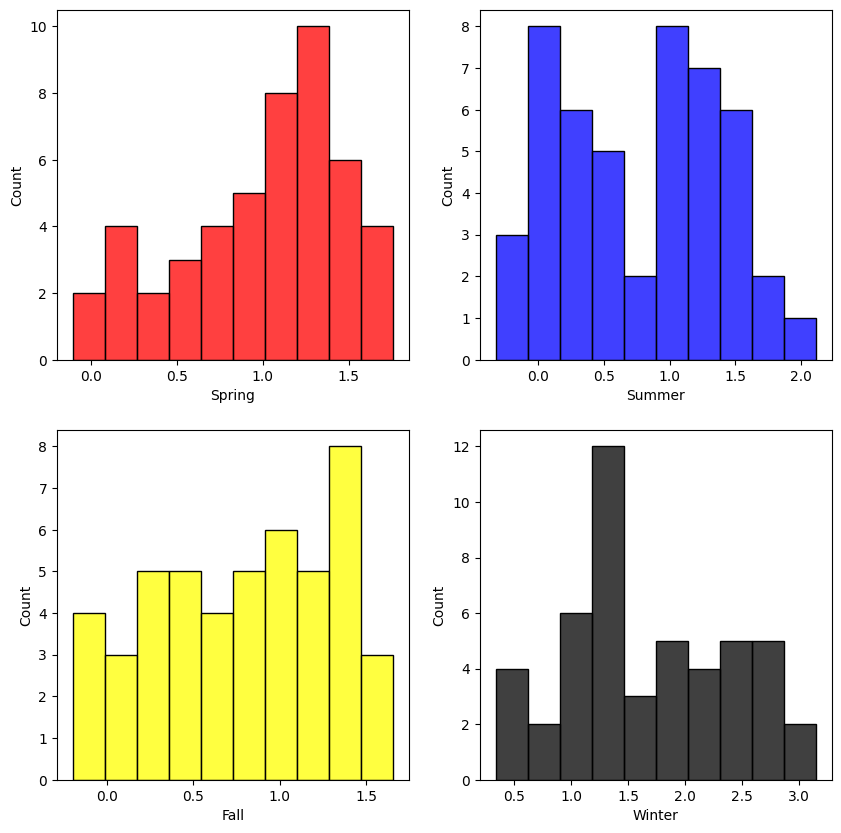

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 2, figsize=(10, 10))

plt.subplot(2, 2, 1)
plt1 = sns.histplot(data = data, x='Spring',color='red', bins=10)

plt.subplot(2, 2, 2)
plt2 = sns.histplot(data = data, x='Summer',color='blue', bins=10)

plt.subplot(2, 2, 3)
plt3 = sns.histplot(data = data, x='Fall',color='yellow', bins=10)

plt.subplot(2, 2, 4)
plt4 = sns.histplot(data = data, x='Winter',color='black', bins=10)

plt1.show()

plt2.show()

plt3.show()

plt4.show()